In [18]:
#Importing the necessary libraries for preprocessing the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
train_path = './train.csv'
test_path = './test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [19]:
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


Checking for nulls in train and test data

In [20]:
train_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [21]:
test_df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

There are no null values so we dont need to do any handling for nulls

In [22]:
# Dropping duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [23]:
#Dropping LoanID and Default columns
X_train = train_df.drop(columns=['LoanID', 'Default'])
Y_train = train_df['Default']

In [24]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

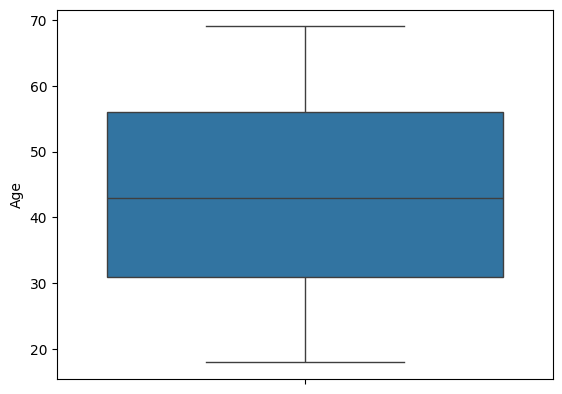

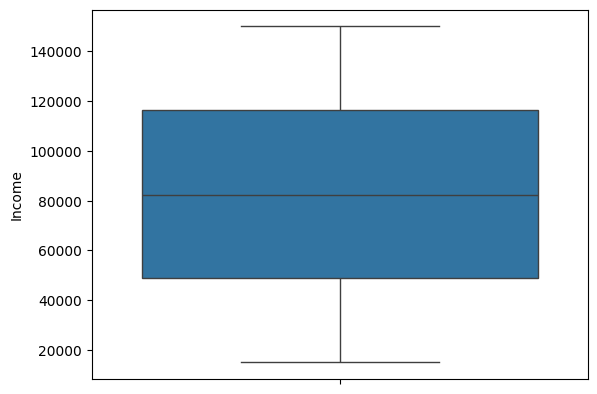

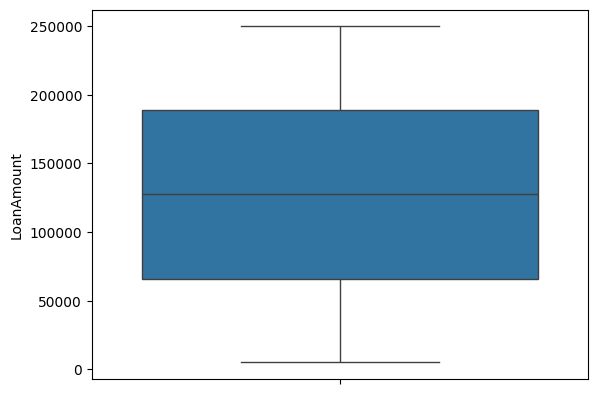

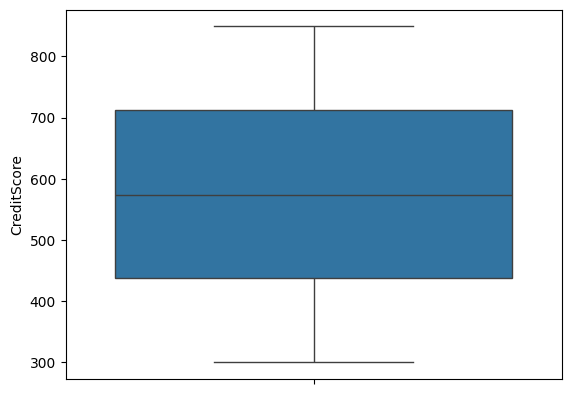

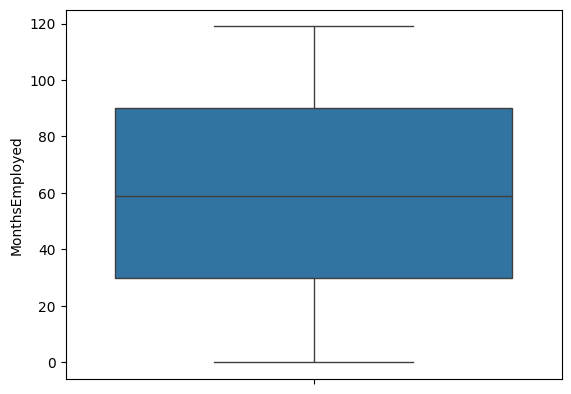

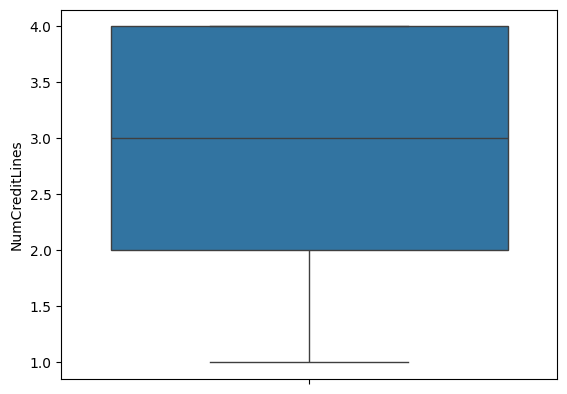

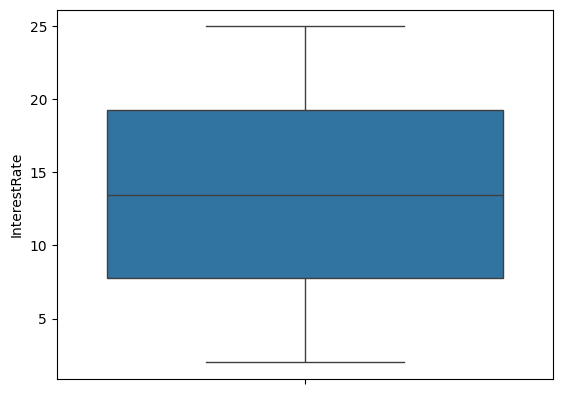

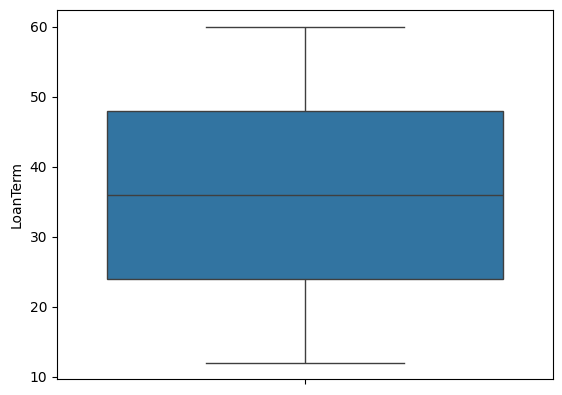

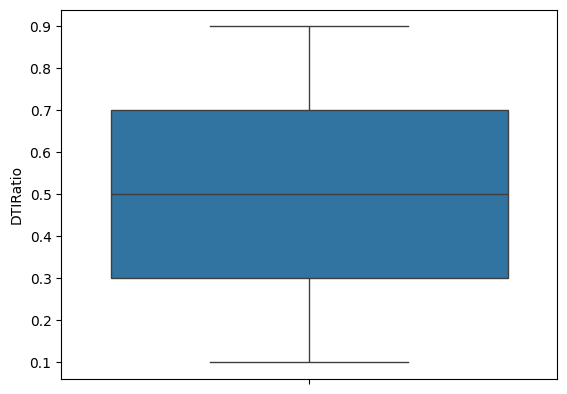

In [25]:
for feature in numerical_features:
    sns.boxplot(X_train[feature])
    plt.show()

There are no outliers. However we can see that the numerical features have different magnitudes, so we need to scale the data.

In [26]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])


In [27]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,High School,Self-employed,Single,Yes,No,Business,No
1,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,High School,Unemployed,Divorced,No,Yes,Education,No
2,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,Master's,Self-employed,Married,No,No,Other,Yes
3,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes
4,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,Bachelor's,Part-time,Single,No,Yes,Education,Yes


In [28]:
le = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = le.fit_transform(X_train[feature])
    test_df[feature] = le.transform(test_df[feature])

In [29]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,1,2,2,1,0,1,0
1,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,1,3,0,0,1,2,0
2,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,2,2,1,0,0,4,1
3,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,0,2,2,1,0,0,1
4,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,0,1,2,0,1,2,1


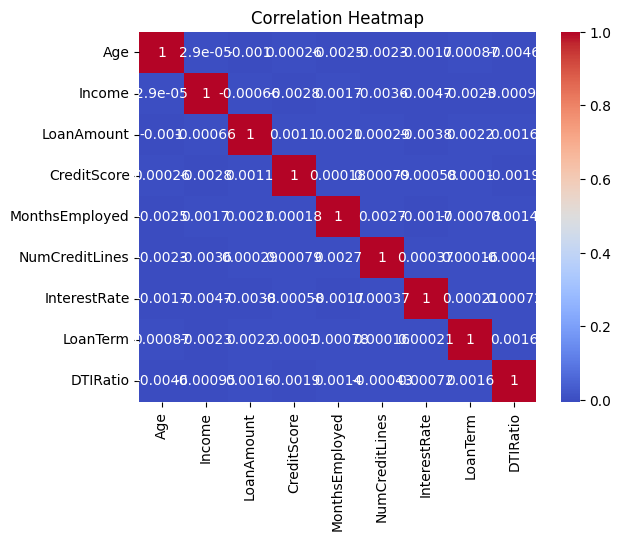

In [30]:
# Calculate correlation for the remaining numeric columns
correlation = train_df[numerical_features].corr()

# Plot the correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation between features is low, so we don't drop any of them.

In [31]:
from scipy.stats import skew

print(skew(Y_train))

2.394081993720339


The data is highly skewed as most data points have 'Default' value 0.
We thus use different methods to handle Imbalanced data.

In [32]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=28)
X_smote, y_smote = smote.fit_resample(X_train, Y_train)
print(skew(y_smote))

ros = RandomOverSampler(random_state=28)
X_ros, y_ros = ros.fit_resample(X_train, Y_train)
print(skew(y_ros))

rus = RandomUnderSampler(random_state=28)
X_rus, y_rus = rus.fit_resample(X_train, Y_train)
print(skew(y_rus))

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0.0
0.0
0.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Thus we have now reduced skew from the data

**Data Preprocessing is complete**

# Model Training

We now try out various models such as SVM, Logistic Regression and Neural networks on the data.

## Linear Regression

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [17]:
from sklearn.linear_model import LogisticRegression

def log_reg(X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=28)
    log_reg = LogisticRegression(max_iter = 1000, random_state=28)
    params = {
        'C': [0.01, 0.1, 1, 8, 10, 100],                          
        'solver': ['liblinear', 'saga', 'newton-cholesky', 'lbfgs', 'sag', 'newton-cg'],     
    }

    logreg_grid_search = GridSearchCV(log_reg, params, cv=5, n_jobs=-1)
    logreg_grid_search.fit(X_train, y_train)   

    print("Best parameters for Logistic Regression: ", logreg_grid_search.best_params_)
    print("Training accuracy: ", logreg_grid_search.best_score_)
    print("Testing accuracy: ", logreg_grid_search.score(X_val, y_val))
    return logreg_grid_search


In [18]:
print("Logistic Regression with Original Data")
log_reg_model = log_reg(X_train, Y_train)
print("\nLogistic Regression with SMOTE Data")
log_reg(X_smote, y_smote)
print("\nLogistic Regression with Random Over Sampling Data")
log_reg(X_ros, y_ros)
print("\nLogistic Regression with Random Under Sampling Data")
log_reg(X_rus, y_rus)


Logistic Regression with Original Data
Best parameters for Logistic Regression:  {'C': 0.1, 'solver': 'liblinear'}
Training accuracy:  0.88568176719485
Testing accuracy:  0.8828323869199138

Logistic Regression with SMOTE Data
Best parameters for Logistic Regression:  {'C': 1, 'solver': 'newton-cholesky'}
Training accuracy:  0.7198187187047589
Testing accuracy:  0.7231269907215068

Logistic Regression with Random Over Sampling Data
Best parameters for Logistic Regression:  {'C': 100, 'solver': 'sag'}
Training accuracy:  0.6803744619251508
Testing accuracy:  0.6803351336380002

Logistic Regression with Random Under Sampling Data
Best parameters for Logistic Regression:  {'C': 0.01, 'solver': 'sag'}
Training accuracy:  0.6786917026153069
Testing accuracy:  0.6797516312355294


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=28),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 8, 10, 100],
                         'solver': ['liblinear', 'saga', 'newton-cholesky',
                                    'lbfgs', 'sag', 'newton-cg']})

We notice that the best accuracy is achieved by the original data without any skew reduction techniques.

In [19]:
# Creating a submission file
def create_submission_file(model, test_df, filename):
    X_test = test_df.drop('LoanID', axis = 1)
    test_pred = model.predict(X_test)
    submission = pd.DataFrame({'LoanID': test_df['LoanID'], 'Default': test_pred})
    submission.to_csv(filename, index=False)


In [24]:
create_submission_file(log_reg_model, test_df, 'submission_lr.csv')

## SVM

In [ ]:

svc = SVC(kernel = 'rbf', random_state=28)

# Defining the parameter grid for RandomizedSearchCV
params = {
    'C': [0.1, 1, 10, 100],         
}

# Performing randomized search for best C value
random_search_svc = RandomizedSearchCV(
    estimator = svc,
    param_distributions = params,
    n_iter = 5, 
    cv=2,  
    random_state = 28,
    n_jobs=-1
)

X_train_split, X_val, Y_train_split, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=28)
random_search_svc.fit(X_train_split, Y_train_split)
print("Best parameters for SVC: ", random_search_svc.best_params_)
svc_pred = random_search_svc.predict(X_val)
print("Training accuracy: ", random_search_svc.best_score_)
print("Testing accuracy: ", accuracy_score(Y_val, svc_pred))


/opt/homebrew/lib/python3.13/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC:  {'C': 10}
Training accuracy:  0.885700124476871
Testing accuracy:  0.8829058155472881


In [ ]:
create_submission_file(random_search_svc, test_df, 'submission_svm.csv')

## Neural Networks

In [34]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters



# Split the data into train and test sets
train_x, val_x, train_y, val_y = train_test_split(X_train, Y_train, test_size=0.2, random_state=28)

# Define the model builder function for Bayesian Optimization
def build_model(hp):
    model = keras.Sequential()
    model.add(
        keras.layers.Dense(
            units=hp.Int('units_1', min_value=32, max_value=512, step=32),
            activation='relu',
            input_shape=(X_train.shape[1],)
        )
    )
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(
            keras.layers.Dense(
                units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32),
                activation='relu'
            )
        )
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of trials to find the best hyperparameters
    executions_per_trial=2,  # Average results over 2 runs
    directory='my_dir',
    project_name='lendorlose'
)

# Perform the search for best hyperparameters
tuner.search(x=train_x, y=train_y, epochs=15, validation_data=(val_x, val_y))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of additional hidden layers is {best_hps.get('num_layers')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

for i in range(best_hps.get('num_layers')+ 1):
    print(f"Layer {i+1} - Units: {best_hps.get(f'units_{i+1}')}")
print(f"Layer {best_hps.get('num_layers')+ 2} - Units: 1 (Output Layer)")

# Train the final model using the best hyperparameters
model = tuner.hypermodel.build(best_hps)

Reloading Tuner from my_dir/lendorlose/tuner0.json

The hyperparameter search is complete.
The optimal number of additional hidden layers is 1.
The optimal learning rate for the optimizer is 0.01.

Layer 1 - Units: 64
Layer 2 - Units: 512
Layer 3 - Units: 1 (Output Layer)


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
history = model.fit(train_x, train_y, epochs=50, validation_split=0.2)

# Evaluate the model
eval_result = model.evaluate(val_x, val_y)

Epoch 1/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step - accuracy: 0.8829 - loss: 0.3333 - val_accuracy: 0.8884 - val_loss: 0.3130
Epoch 2/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - accuracy: 0.8844 - loss: 0.3185 - val_accuracy: 0.8880 - val_loss: 0.3114
Epoch 3/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 766us/step - accuracy: 0.8849 - loss: 0.3190 - val_accuracy: 0.8885 - val_loss: 0.3113
Epoch 4/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 762us/step - accuracy: 0.8856 - loss: 0.3181 - val_accuracy: 0.8882 - val_loss: 0.3128
Epoch 5/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 816us/step - accuracy: 0.8850 - loss: 0.3180 - val_accuracy: 0.8880 - val_loss: 0.3131
Epoch 6/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step - accuracy: 0.8846 - loss: 0.3186 - val_accuracy: 0.8878 - val_loss: 0.3145
Epoch 7/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 773us/step - accuracy: 0.8853 - loss: 0.3164 - val_accuracy: 0.8876 - val_loss: 0.3145
Epoch 8/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - accuracy: 0.8840 -

In [22]:
print("[Test loss, Test accuracy]:", eval_result)
print('[Train loss, accuracy]:', model.evaluate(train_x, train_y, verbose=0))

[Test loss, Test accuracy]: [0.32194197177886963, 0.8824407458305359]
[Train loss, accuracy]: [0.3140495717525482, 0.8847026824951172]


In [ ]:
# Training the model on SMOTE data
smote_x, smote_val_x, smote_y, smote_val_y = train_test_split(X_smote, y_smote, test_size=0.2, random_state=28)
history = model.fit(smote_x, smote_y, epochs=50, validation_split=0.2)

# Evaluate the model
eval_result = model.evaluate(smote_val_x, smote_val_y)
print('On SMOTE Data:')
print("[Test loss, Test accuracy]:", eval_result)
print('[Train loss, accuracy]:', model.evaluate(smote_x, smote_y, verbose=0))

Epoch 1/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 6s 727us/step - accuracy: 0.7148 - loss: 0.5590 - val_accuracy: 0.7254 - val_loss: 0.5600
Epoch 2/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 690us/step - accuracy: 0.7286 - loss: 0.5413 - val_accuracy: 0.7276 - val_loss: 0.5399
Epoch 3/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 687us/step - accuracy: 0.7321 - loss: 0.5367 - val_accuracy: 0.7194 - val_loss: 0.5493
Epoch 4/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 734us/step - accuracy: 0.7310 - loss: 0.5379 - val_accuracy: 0.7282 - val_loss: 0.5391
Epoch 5/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 687us/step - accuracy: 0.7311 - loss: 0.5367 - val_accuracy: 0.7263 - val_loss: 0.5407
Epoch 6/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 705us/step - accuracy: 0.7315 - loss: 0.5359 - val_accuracy: 0.7291 - val_loss: 0.5396
Epoch 7/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 690us/step - accuracy: 0.7316 - loss: 0.5353 - val_accuracy: 0.7262 - val_loss: 0.5401
Epoch 8/50
7221/7221 ━━━━━━━━━━━━━━━━━━━━ 5s 688us/step - accuracy: 0.7317 -

In [23]:
model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

Epoch 1/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 4s 805us/step - accuracy: 0.8851 - loss: 0.3160 - val_accuracy: 0.8879 - val_loss: 0.3120
Epoch 2/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 4s 828us/step - accuracy: 0.8831 - loss: 0.3207 - val_accuracy: 0.8882 - val_loss: 0.3100
Epoch 3/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 5s 900us/step - accuracy: 0.8849 - loss: 0.3163 - val_accuracy: 0.8882 - val_loss: 0.3135
Epoch 4/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 5s 987us/step - accuracy: 0.8841 - loss: 0.3189 - val_accuracy: 0.8875 - val_loss: 0.3152
Epoch 5/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 4s 838us/step - accuracy: 0.8852 - loss: 0.3173 - val_accuracy: 0.8876 - val_loss: 0.3130
Epoch 6/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 4s 773us/step - accuracy: 0.8850 - loss: 0.3167 - val_accuracy: 0.8880 - val_loss: 0.3182
Epoch 7/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 5s 920us/step - accuracy: 0.8854 - loss: 0.3163 - val_accuracy: 0.8876 - val_loss: 0.3121
Epoch 8/50
5107/5107 ━━━━━━━━━━━━━━━━━━━━ 4s 784us/step - accuracy: 0.8853 -

In [24]:
import numpy as np

X_test = test_df.drop('LoanID', axis = 1)

# Predict probabilities for test set (output of sigmoid activation function of the last layer)
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions with threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

y_pred = np.squeeze(y_pred)

# Create the submission dataframe
submission_df = pd.DataFrame({'LoanID': test_df['LoanID'],
                              'Default': y_pred})

# Save the submission file

submission_df.to_csv('submission_nn.csv', index=False)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step
